In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob as gb
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

### training information

In [2]:
labels = ["buildings", "forest", "mountain", "sea"]
training_images = []
training_labels = []
idx = 0
class_label = 0
train = "training/"
for folder in  os.listdir(train) :
    print(folder)
    files = gb.glob(pathname= str( train + folder + '/*.jpg'))
    for image in files:
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv.resize(data , (32,32))
        training_images.append(list(image_array))
        training_labels.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

buildings
forest
mountain
sea


In [3]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)
print(training_images.shape)
print(training_labels.shape)

(10669, 32, 32)
(10669,)


In [4]:
training_images = training_images.reshape(len(training_images), -1)
training_images.shape

(10669, 1024)

### testing information

In [5]:
labels = ["buildings", "forest", "mountain", "sea"]
testing_images = []
testing_labels = []
idx = 0
class_label = 0
test = "testing/"
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname= str( test + folder + '/*.jpg'))
    for image in files:
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv.resize(data , (32,32))
        testing_images.append(list(image_array))
        testing_labels.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

buildings
forest
mountain
sea


In [6]:
testing_images = np.array(testing_images)
testing_labels = np.array(testing_labels)
print(testing_images.shape)
print(testing_labels.shape)

(960, 32, 32)
(960,)


In [7]:
testing_images = testing_images.reshape(len(testing_images), -1)
testing_images.shape

(960, 1024)

In [8]:
model = svm.SVC(kernel='rbf',max_iter=10000)
result = model.fit(training_images, training_labels)

In [9]:
prediction = model.predict(testing_images)
print ("Accuracy = ", metrics.accuracy_score(testing_labels, prediction))

Accuracy =  0.75


### confusion curve

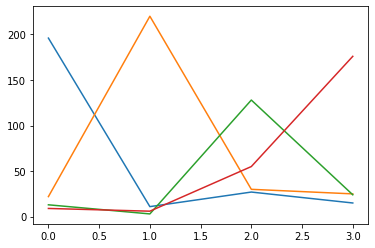

In [10]:
from sklearn.metrics import confusion_matrix
plt.plot(confusion_matrix(testing_labels,prediction))